In [5]:
# Importação das bibliotecas
import cv2
import matplotlib.pyplot as plt
import easyocr

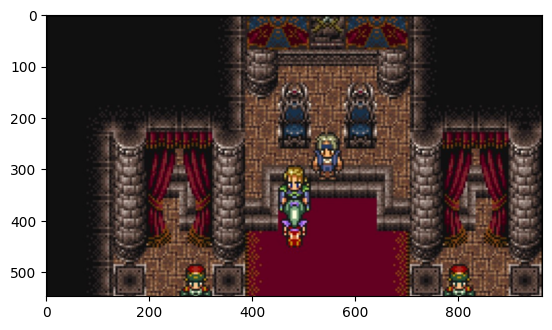

In [6]:
# Carregamento da imagem
#image_path = 'FFVI\\Dialog\\options.jpg'
image_path = 'FFVI\\Maps\\trono.jpg'
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Nenhum texto encontrado na imagem. Tela normal.


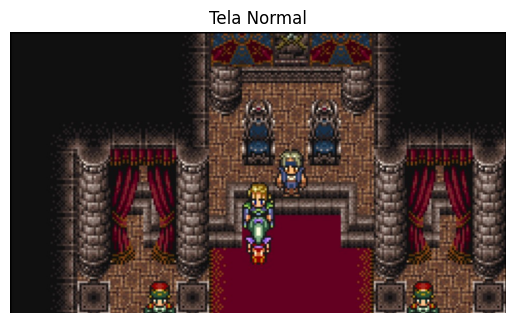

In [7]:
# Função para identificar texto na imagem
def identificar_texto(image_path):
    # Carregar a imagem
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Aplicar OCR na imagem para detectar texto
    reader = easyocr.Reader(['en'])  # Adicionar idiomas conforme necessário
    result = reader.readtext(image_rgb)
    
    # Verificar se há texto
    if result:
        print("Texto encontrado na imagem.")
        # Exibir a imagem com as áreas de texto destacadas
        for (bbox, text, prob) in result:
            # Desenhar um retângulo ao redor do texto detectado
            top_left = tuple(map(int, bbox[0]))
            bottom_right = tuple(map(int, bbox[2]))
            cv2.rectangle(image_rgb, top_left, bottom_right, (0, 255, 0), 2)
            plt.text(top_left[0], top_left[1] - 10, text, bbox=dict(facecolor='yellow', alpha=0.5), fontsize=12, color='black')
        
        plt.imshow(image_rgb)
        plt.axis('off')
        plt.title('Texto Detectado')
        plt.show()
    else:
        print("Nenhum texto encontrado na imagem. Tela normal.")
        plt.imshow(image_rgb)
        plt.axis('off')
        plt.title('Tela Normal')
        plt.show()

# Chamar a função para identificar texto na imagem
identificar_texto(image_path)
